<a href="https://colab.research.google.com/github/gtoge/GeneClassification/blob/master/ColumnTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personalized Medicine: Redefining Cancer Treatment¶

The problem link:https://www.kaggle.com/c/msk-redefining-cancer-treatment. This competition was launched by Memorial Sloan Kettering Cancer Center (MSKCC).
The challenge was to distinguaish the mutations that contribute to tumor growths from neutral mutations.
the competiotion was accepted by the NIPS 2017 competion Track.
MSKCC provided expert-annotated knowledge base.
Multi Class Log Loss is the recomended scoring matrix.

# Steps to take
- problem statement
- loading data
- processing of data
- feature extraction
- Model building
- training
- testing
- conclusion

# Problem Statement
Develop an ML model that uses knowledge base as basline to automatically classifies genetic variations.


# Data 
- loading the data
- analysing the data
- precessing the data
- feature extraction


In [0]:
# importing some initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# google colab code to import data from my drive
from google.colab import files
files.upload()

Saving training_variants to training_variants (1)


{'training_variants': b"ID,Gene,Variation,Class\n0,FAM58A,Truncating Mutations,1\n1,CBL,W802*,2\n2,CBL,Q249E,2\n3,CBL,N454D,3\n4,CBL,L399V,4\n5,CBL,V391I,4\n6,CBL,V430M,5\n7,CBL,Deletion,1\n8,CBL,Y371H,4\n9,CBL,C384R,4\n10,CBL,P395A,4\n11,CBL,K382E,4\n12,CBL,R420Q,4\n13,CBL,C381A,4\n14,CBL,P428L,5\n15,CBL,D390Y,4\n16,CBL,Truncating Mutations,1\n17,CBL,Q367P,4\n18,CBL,M374V,5\n19,CBL,Y371S,4\n20,CBL,H94Y,6\n21,CBL,C396R,4\n22,CBL,G375P,4\n23,CBL,S376F,4\n24,CBL,P417A,4\n25,CBL,H398Y,4\n26,SHOC2,S2G,4\n27,TERT,Y846C,4\n28,TERT,C228T,7\n29,TERT,H412Y,4\n30,TERT,H876Q,4\n31,TERT,Promoter Mutations,7\n32,TERT,P704S,4\n33,TERT,Amplification,2\n34,TERT,C250T,7\n35,DICER1,G1809R,4\n36,DICER1,G1809K,4\n37,DICER1,D1709E,1\n38,DICER1,D1709A,1\n39,DICER1,E1705A,4\n40,DICER1,D1810A,4\n41,DICER1,Truncating Mutations,1\n42,DICER1,E1705K,4\n43,DICER1,Deletion,1\n44,PTPRT,T1365M,4\n45,PTPRT,V648G,1\n46,PTPRT,T844M,4\n47,PTPRT,A707T,1\n48,PTPRT,Promoter Hypermethylation,4\n49,PTPRT,R1343L,4\n50,PTPRT,A2

In [3]:
from google.colab import files
files.upload()

Saving training_text to training_text (1)


## Loading the data

In [0]:
# start with loading data
# Loading training_variants. Its a comma seperated file
data_variants = pd.read_csv('training_variants')
# Loading training_text dataset. This is seperated by ||
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
#Analysing the Variant data

## Analysing the data

In [5]:
#visualizing a sample of the variants data
data_variants.head(5)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [6]:
#getting more information on the data
data_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [7]:
#getting statistical info
data_variants.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [8]:
# Checking dimention of data
data_variants.shape

(3321, 4)

In [9]:
# Checking column in the variant data set
# Not very important as we can see it from the .head()
data_variants.columns

Index(['ID', 'Gene', 'Variation', 'Class'], dtype='object')

In [10]:
#visualizing a sample of the text data
data_text.head(5)

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [11]:
# visualizing the tail of text data
data_text.tail(5)

,ID,TEXT
3316,3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,The Runt-related transcription factor 1 gene (...
3319,3319,The RUNX1/AML1 gene is the most frequent targe...
3320,3320,The most frequent mutations associated with le...


In [12]:
#getting more information on the data
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
ID      3321 non-null int64
TEXT    3316 non-null object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [13]:
data_text.describe()

,ID
count,3321.000000
mean,1660.000000
std,958.834449
min,0.000000
25%,830.000000
50%,1660.000000
75%,2490.000000
max,3320.000000


In [14]:
# Checking dimention of data
data_text.shape

(3321, 2)

In [15]:
# Checking column in the text data set
# Not very important as we can see it from the .head()
data_text.columns

Index(['ID', 'TEXT'], dtype='object')

In [0]:
#merging both files
#merging both gene_variations and text data based on ID
result = pd.merge(data_variants, data_text,on='ID', how='left')

In [17]:
#what kind of data we have in our class
result['Class'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
#checking to see if merge was correct
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
TEXT         3316 non-null object
dtypes: int64(2), object(3)
memory usage: 155.7+ KB


In [19]:
# checking and handling Missing data 
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [0]:
#hadling missing data via imputation,replacing missing data with gene+variation
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [21]:
# checking and handling Missing data 
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT


In [22]:
# Checking the distribution of each paramater 
TEXT_Distribution=result.groupby('Class').TEXT.count()
Gene_Distribution=result.groupby('Class').Gene.count()
Variation_Distribution=result.groupby('Class').Variation.count()
print(TEXT_Distribution)
print(Gene_Distribution)
print(Variation_Distribution)

Class
1    568
2    452
3     89
4    686
5    242
6    275
7    953
8     19
9     37
Name: TEXT, dtype: int64
Class
1    568
2    452
3     89
4    686
5    242
6    275
7    953
8     19
9     37
Name: Gene, dtype: int64
Class
1    568
2    452
3     89
4    686
5    242
6    275
7    953
8     19
9     37
Name: Variation, dtype: int64


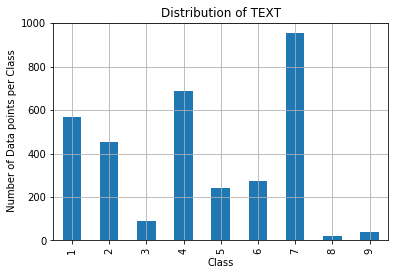

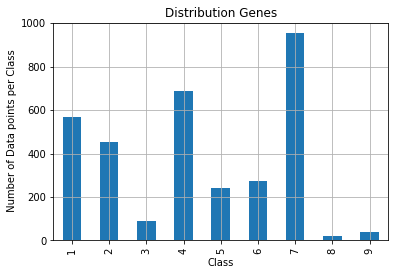

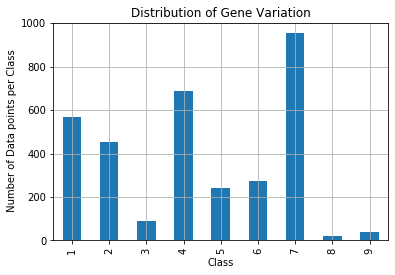

In [23]:
# Visualising using a bar shart
TEXT_Distribution.plot(kind='bar' )
plt.xlabel('Class')
plt.ylabel(' Number of Data points per Class')
plt.title('Distribution of TEXT')
plt.grid()
plt.show()

Gene_Distribution.plot(kind='bar' )
plt.xlabel('Class')
plt.ylabel(' Number of Data points per Class')
plt.title('Distribution Genes')
plt.grid()
plt.show()

Variation_Distribution.plot(kind='bar' )
plt.xlabel('Class')
plt.ylabel(' Number of Data points per Class')
plt.title('Distribution of Gene Variation')
plt.grid()
plt.show()

In [0]:
#Seperating ground truth from main data
X=result[['ID','Gene','Variation','TEXT']]
y_true=result[['Class']]

In [25]:
# cheching separations
X.head(2)

,ID,Gene,Variation,TEXT
0,0,FAM58A,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,Abstract Background Non-small cell lung canc...


In [26]:
# checking seperations
y_true.head(2)

,Class
0,1
1,2


# Text Preprocessing
- we will do some dimensionality reduction by applying some customized transformations:
- text lamentazation
- Removing stop words
- Removing special characters
- lowcasing all letters
NB since we are applying some customization,we might loss some default functionalities of the feature Extraction algorithm.


In [0]:
# under developement
# Customized preprocessor
import re
import nltk

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


def my_Preprocessor(doc):
  #replacing special characters with a space and a double space with a single space
  #doc=[doc.lower() for word in doc]
  TEXT= re.sub('[^a-zA-Z0-9\n]','', str(doc))
  text= re.sub('\s+','', str(TEXT))
  # Tokenizer
  nltk.download('punkt')
  tokens=word_tokenize(text)
  # removing stopwords
  nltk.download('stopwords')
  stop_words=stopwords.words('english')
  DOC=[word for word in tokens  if word not in stop_words]
  return DOC
  
def lem(doc):
  #stemmer
  nltk.download('wordnet')
  Wln=WordNetLemmatizer()
  text_lem=[Wln.lemmatize(word) for word in DOC]
  return text_lem





In [0]:
def lowercase(doc):
  doc.str.lower()
  return doc

In [0]:
TEXT=X['TEXT']
my_Preprocessor(TEXT)
TEXT.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    Cyclin-dependent kinases (CDKs) regulate a var...
1     Abstract Background  Non-small cell lung canc...
2     Abstract Background  Non-small cell lung canc...
3    Recent evidence has demonstrated that acquired...
4    Oncogenic mutations in the monomeric Casitas B...
Name: TEXT, dtype: object

## Feature Extraction
-Using columnTransformer since the colums uses different transformation

In [0]:
#required library
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
# We create the preprocessor for both data type
# setting sparse_threshold=0 to deal with sparse data
preprocessor=ColumnTransformer(
   transformers= [
       ('Gene_category',OneHotEncoder(),['Gene']),
       ('Variation_category',CountVectorizer(),'Variation'),
       ('TEXT_category',TfidfVectorizer(stop_words='english',ngram_range=(1,1)),'TEXT')],
       sparse_threshold=0)

     



In [28]:
# Running the preprocessor to get features
X_prep=preprocessor.fit_transform(X) 
print(X_prep.shape)
print(X_prep)




(3321, 158723)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
#splitting the data into test and training data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prep, y_true, test_size=0.2)

# Machine Learning
- we wll used SGD as it perform better in our research



In [30]:
#Libraries
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier


calibrated_SGDClassifier= CalibratedClassifierCV(
       base_estimator=SGDClassifier())
param_grid = {
    'base_estimator__alpha':[1.e-10,1.e-5, 1.e-3]
    #'base_estimator__penalty':   ('l2', 'elasticnet')
            #'base_estimator__max_iter': [10, 50, 80]
 }
# use a full grid over all parameters
search = GridSearchCV(calibrated_SGDClassifier, param_grid, cv=5,verbose=1)
# start timer to measure training time
start=time.time()
#training
search.fit(X_train, y_train)
stop=time.time()
print(f"Training time:{stop-start}s")


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:453: RuntimeWarning: overflow encountered in exp

Training time:2510.5381469726562s


/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:453: RuntimeWarning: overflow encountered

In [0]:
#save Model Uisng Pickle
from google.colab import files
import pickle
filename='trained_model.sav'
pickle.dump(search,open(filename,'wb'))

In [32]:
#Prediction
start=time.time()
y_pred=search.predict(X_test)
stop=time.time()
print(y_pred)
print(f"Prediction time: {stop-start}s")

[7 1 6 7 4 5 1 4 7 1 1 1 7 1 3 1 4 6 5 7 7 2 4 7 7 2 7 7 4 4 4 5 7 4 4 7 7
 7 7 7 7 4 1 7 1 4 2 5 7 7 6 7 2 1 4 5 1 4 2 7 7 7 2 7 7 1 2 7 7 2 9 7 7 2
 1 2 7 1 1 5 4 7 7 2 7 7 7 1 2 4 1 7 4 6 7 7 7 7 7 7 1 7 5 4 6 1 1 4 1 7 4
 4 4 7 4 4 5 9 4 4 1 2 7 4 6 7 4 1 7 1 7 3 7 2 1 1 7 4 2 7 4 7 7 2 7 4 4 1
 6 7 7 7 7 1 2 1 2 1 2 4 7 4 4 7 1 7 6 6 7 7 2 4 1 2 4 7 3 7 2 4 7 2 6 1 7
 4 1 1 7 1 4 7 7 7 4 1 4 7 7 4 4 1 2 5 4 4 4 1 7 7 1 7 2 6 7 7 2 7 4 4 5 7
 7 7 1 5 7 2 7 2 6 6 7 6 7 6 1 4 7 4 6 6 4 1 2 7 7 1 1 1 7 7 7 6 6 1 4 7 1
 4 7 4 5 1 7 4 4 7 7 7 1 5 6 1 1 4 7 6 7 1 4 4 4 7 1 7 6 7 1 6 7 1 5 4 1 4
 4 7 7 1 4 6 1 7 4 2 4 4 7 7 6 4 2 7 2 7 1 2 1 2 7 7 6 7 6 4 7 7 7 7 1 4 4
 4 1 4 7 2 7 4 7 1 2 7 7 1 1 7 4 4 9 1 6 2 4 7 6 5 7 2 7 7 4 7 4 7 7 7 7 7
 7 1 1 2 1 7 4 1 5 6 6 7 1 4 1 1 4 7 7 2 4 2 6 2 6 7 7 1 4 6 4 7 7 5 2 4 4
 4 7 7 7 7 4 4 4 3 4 7 7 4 4 4 7 1 7 1 5 1 7 1 7 6 1 7 7 4 6 4 1 4 5 2 7 4
 4 2 1 7 7 1 1 7 4 4 1 4 4 4 1 1 2 7 7 2 4 2 7 7 7 4 7 1 4 6 6 1 1 7 7 1 7
 4 7 2 4 1 4 2 7 4 4 7 7 

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
score=accuracy_score(y_test,y_pred)
print(score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.6526315789473685
[[ 64   2   1  26   5   2   7   0   0]
 [  1  40   0   1   0   0  26   0   0]
 [  0   2   2  10   1   0  14   0   0]
 [ 34   1   1 102   6   1   2   0   0]
 [ 16   1   2   6  15   5  12   0   0]
 [  6   1   0   3   1  42  14   0   0]
 [  0  15   0   0   0   0 165   0   0]
 [  0   1   0   0   0   0   2   0   0]
 [  0   1   0   1   0   0   1   0   4]]
              precision    recall  f1-score   support

           1       0.53      0.60      0.56       107
           2       0.62      0.59      0.61        68
           3       0.33      0.07      0.11        29
           4       0.68      0.69      0.69       147
           5       0.54      0.26      0.35        57
           6       0.84      0.63      0.72        67
           7       0.68      0.92      0.78       180
           8       0.00      0.00      0.00         3
           9       1.00      0.57      0.73         7

    accuracy                           0.65       665
   macro avg       0.58      0.48

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
# to avoid rounding error while multiplying probabilites we use log-probability estimates
from sklearn.metrics import log_loss
y_prob=search.predict_proba(X_test)
print("Log Loss :",log_loss(y_test, y_prob))


Log Loss : 1.0564454103117034


In [45]:
# Doing Prediction
test_point=30
test_data=X_test[test_point].reshape(1,-1)
ground_truth=y_test.iloc[test_point]
print(test_data)
pred=search.predict(test_data)
pred_accuracy=accuracy_score(ground_truth,pred)
print('prediction:',pred)
print('accuracy:',pred_accuracy)
print('ground_truth:',ground_truth)
pred_prob=search.predict_proba(test_data)
print('predicted probabilities:',pred_prob)


[[0. 0. 0. ... 0. 0. 0.]]
prediction: [4]
accuracy: 1.0
ground_truth: Class    4
Name: 573, dtype: int64
predicted probabilities: [[0.21395309 0.07352149 0.05372959 0.51560817 0.04179014 0.05521969
  0.03902144 0.0041323  0.00302409]]


<function matplotlib.pyplot.show>

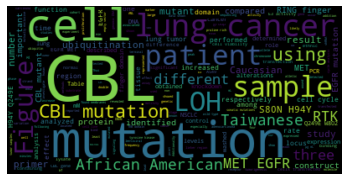

In [49]:
# Most used words in the test data
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
text=result.TEXT[2]
#create and generate a word cloud
wordcloud=WordCloud().generate(text)
#display
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show


In [0]:
#Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

# Calibrated classifier
calibrated_SGDClassifier= CalibratedClassifierCV(
       base_estimator=SGDClassifier())
#Pipeline
pipe=Pipeline( steps=([
    ('preprocessor',preprocessor),
    ('model',calibrated_SGDClassifier)]))
              
param_grid={'model__base_estimator__alpha':[0.00001, 0.000001]}

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

search = GridSearchCV(pipe, param_grid, cv=5,verbose=True).fit(X_train, y_true)

ValueError: Found input variables with inconsistent numbers of samples: [2656, 3321]